In [4]:
pip install keras_preprocessing


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 KB 2.1 MB/s eta 0:00:00


In [8]:
pip install transformers


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.7/6.7 MB 48.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 94.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.2/199.2 KB 26.3 MB/s eta 0:00:00


In [5]:
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM, SpatialDropout1D
from sklearn.model_selection import train_test_split
from keras.preprocessing.text import Tokenizer

from keras.utils.np_utils import to_categorical
from keras_preprocessing.sequence import pad_sequences

In [9]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from transformers import TFAutoModel, AutoTokenizer
import seaborn as sns
from transformers import AutoTokenizer, TFAutoModelForSequenceClassification

In [10]:
# Load the data into a Pandas dataframe
df = pd.read_csv('/content/main_data.csv')

In [11]:
df

,Unnamed: 0,content,label
0,0,Researchers use deep learning to simulate chlo...,Positive
1,1,Why is our @Conservatives government so evil?\...,Negative
2,2,"Texas Oilfield Waste Company Contributed $53,7...",Negative
3,3,Epic California snowpack is now the deepest it...,Negative
4,4,If #climatechange is real and not a hoax why d...,Negative
...,...,...,...
4405,353,['𝐃𝐚𝐭𝐚 𝐃𝐫𝐢𝐯𝐞𝐧 𝐃𝐄𝐈 with @ team73bit (73bit. com...,Neutral
4406,354,['𝐃𝐚𝐭𝐚 𝐃𝐫𝐢𝐯𝐞𝐧 𝐃𝐄𝐈 with @ team73bit (73bit. com...,Neutral
4407,355,['Motivation direction on how to discover # su...,Positive
4408,356,['𝐃𝐚𝐭𝐚 𝐃𝐫𝐢𝐯𝐞𝐧 𝐃𝐄𝐈 with @ team73bit (73bit. com...,Neutral


In [12]:
from imblearn.over_sampling import RandomOverSampler

In [13]:
# define the oversampler
oversampler = RandomOverSampler(sampling_strategy={'Negative': 1842, 'Positive': 1822, 'Neutral': 1842})

In [14]:
# separate the features and the label
X = df.drop('label', axis=1)
y = df['label']

In [15]:
# oversample the negative class
X_resampled, y_resampled = oversampler.fit_resample(X, y)


In [16]:
# create the updated dataframe
df_resampled = pd.concat([X_resampled, y_resampled], axis=1)

In [17]:
df_resampled

,Unnamed: 0,content,label
0,0,Researchers use deep learning to simulate chlo...,Positive
1,1,Why is our @Conservatives government so evil?\...,Negative
2,2,"Texas Oilfield Waste Company Contributed $53,7...",Negative
3,3,Epic California snowpack is now the deepest it...,Negative
4,4,If #climatechange is real and not a hoax why d...,Negative
...,...,...,...
5501,252,['Auckland floods: What to do if your rental h...,Negative
5502,417,Why does @HomeDepot sell multi coat paints tie...,Negative
5503,928,First changes under Shell's new CEO combine up...,Negative
5504,454,Private #finance could provide $3.5trn a year ...,Negative


In [18]:
df_resampled['label'].value_counts()

Negative    1842
Neutral     1842
Positive    1822
Name: label, dtype: int64

<Axes: xlabel='label', ylabel='count'>

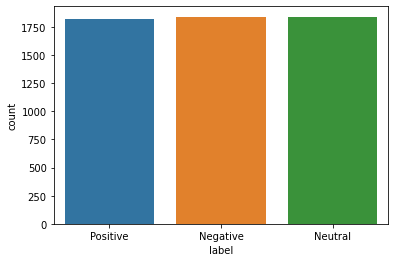

In [19]:
# Create a countplot of the labels
sns.countplot(x='label', data=df_resampled)

In [20]:
X=df_resampled['content']

In [21]:
y=df_resampled['label']

In [23]:
# Tokenize the text data
tokenizer = Tokenizer(num_words=5000, split=' ')
tokenizer.fit_on_texts(X.values)
X = tokenizer.texts_to_sequences(X.values)
X = pad_sequences(X)



In [24]:
# Split the data into training and testing sets
Y = pd.get_dummies(y).values
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)



In [25]:
# Define the RNN model
embed_dim = 128
lstm_out = 196
model = Sequential()
model.add(Embedding(5000, embed_dim, input_length=X.shape[1]))
model.add(SpatialDropout1D(0.4))
model.add(LSTM(lstm_out, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(3, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])



In [26]:
# Train the model
batch_size = 5
model.fit(X_train, Y_train, epochs=10, batch_size=batch_size, verbose=2)



Epoch 1/10
881/881 - 175s - loss: 0.9512 - accuracy: 0.5020 - 175s/epoch - 199ms/step
Epoch 2/10
881/881 - 165s - loss: 0.5730 - accuracy: 0.7239 - 165s/epoch - 188ms/step
Epoch 3/10
881/881 - 165s - loss: 0.3465 - accuracy: 0.8556 - 165s/epoch - 188ms/step
Epoch 4/10
881/881 - 165s - loss: 0.2087 - accuracy: 0.9219 - 165s/epoch - 187ms/step
Epoch 5/10
881/881 - 165s - loss: 0.1474 - accuracy: 0.9525 - 165s/epoch - 188ms/step
Epoch 6/10
881/881 - 165s - loss: 0.1095 - accuracy: 0.9603 - 165s/epoch - 188ms/step
Epoch 7/10
881/881 - 166s - loss: 0.0916 - accuracy: 0.9705 - 166s/epoch - 188ms/step
Epoch 8/10
881/881 - 165s - loss: 0.0839 - accuracy: 0.9725 - 165s/epoch - 187ms/step
Epoch 9/10
881/881 - 165s - loss: 0.0648 - accuracy: 0.9780 - 165s/epoch - 188ms/step
Epoch 10/10
881/881 - 166s - loss: 0.0491 - accuracy: 0.9832 - 166s/epoch - 188ms/step


In [27]:
# Evaluate the model
score, acc = model.evaluate(X_test, Y_test, verbose=2, batch_size=batch_size)
print('Test score:', score)
print('Test accuracy:', acc)

221/221 - 8s - loss: 0.5436 - accuracy: 0.8475 - 8s/epoch - 36ms/step
Test score: 0.5435890555381775
Test accuracy: 0.8475499153137207
